In [1]:
# Author: Sumanyu Muku and Pascal Wallisch

# Lab 11: Unsupervised Learning

## Table of Contents:
* [Eigendecomposition](#zero-bullet)
* [Singular Vector Decomposition](#first-bullet)
* [Principal Component Analysis](#second-bullet)
* [K-Means](#third-bullet)
* [DBSCAN](#fourth-bullet)

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns
import requests
from sklearn import datasets
from sklearn.decomposition import PCA as sk_PCA
from sklearn.cluster import KMeans as sk_KMeans, DBSCAN as sk_DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.pipeline import Pipeline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## 1. Eigendecomposition <a class="anchor" id="zero-bullet"></a>

The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that we want to find a product of matrices that is equal to the initial matrix. In the case of the eigendecomposition, we decompose the initial matrix into the product of its eigenvectors and eigenvalues. Before all, let's see what are eigenvectors and eigenvalues.

#### Matrices as linear transformations

You can think of matrices as linear transformations. Some matrices will rotate your space, others will rescale it etc. So when we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we 'apply' the matrix to the vector it means that we calculate the dot product of the matrix with the vector. We will start with a basic example of this kind of transformation.

In [3]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

In [4]:
A = np.array([[-1, 3], [2, -2]])
A

array([[-1,  3],
       [ 2, -2]])

In [5]:
v = np.array([[2], [1]])
v

array([[2],
       [1]])

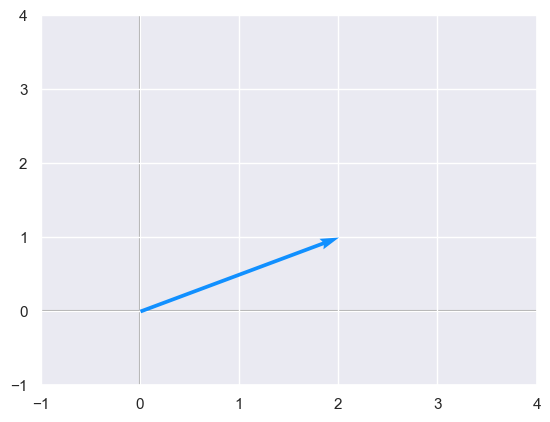

In [6]:
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()

[[1]
 [2]]


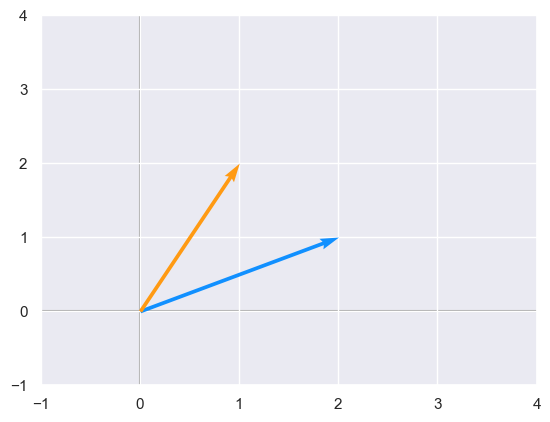

In [7]:
Av = A.dot(v)
print(Av)
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()

#### Eigenvectors and eigenvalues

We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial vector gives us a new vector that has the exact same direction. The scale can be different but the direction is the same. Applying the matrix didn't change the direction of the vector. This special vector is called an eigenvector of the matrix. We will see that finding the eigenvectors of a matrix can be very useful.

<span class='pquote'>
    Imagine that the transformation of the initial vector by the matrix gives a new vector with the exact same direction. This vector is called an eigenvector of $\bs{A}$.
</span>

This means that $\bs{v}$ is a eigenvector of $\bs{A}$ if $\bs{v}$ and $\bs{Av}$ are in the same direction or to rephrase it if the vectors $\bs{Av}$ and $\bs{v}$ are parallel. The output vector is just a scaled version of the input vector. This scalling factor is $\lambda$ which is called the **eigenvalue** of $\bs{A}$.

$$
\bs{Av} = \lambda\bs{v}
$$

In [8]:
# Lets get the eigenvalues of the matrix used above. We use the eig function found in np.linalg
eigenVals, eigenVecs = np.linalg.eig(A)
print("Number of eigenvalues of A: ", len(eigenVals))

Number of eigenvalues of A:  2


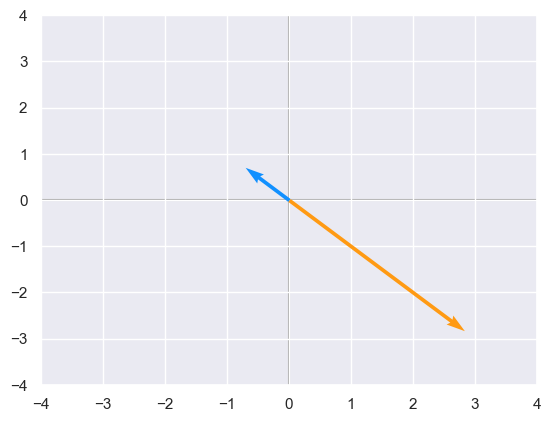

In [9]:
## Let's plot the eigenvectors and their corresponding product with A matrix
ev1 = eigenVecs[:, 1]
A_ev1=A.dot(ev1)

plotVectors([ev1.flatten(), A_ev1.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()

So if all of our eigenvectors for matrix **A** are represented by **Q** matrix and **$\lambda$** is a diagonal matrix containing eigenvalues then:
\begin{equation}
A = Q.\lambda.Q^{-1}
\end{equation}

In [10]:
## Lets check if it is true
np.allclose(A, eigenVecs@np.diag(eigenVals)@np.linalg.inv(eigenVecs))
## If assertion fails then an assertion error is generated

True

**Question**: Can you do eigendecomposition for non-square matrices?

No

In the later part of the notebook we will take a look at Principal Component Analysis: one of the use cases of eigen decomposition

## 2. Singular Value Decomposition  <a class="anchor" id="first-bullet"></a>

Singular Value Decomposition is another type of matrix decomposition. The singular value decomposition of an $m\times n$ matrix $M$ is a factorization of the form: 

$$M = U {\Sigma } V^{T} $$

where:


- $U$ is an ${\displaystyle m\times m}$ orthogonal rotation matrix, 

- ${\Sigma }$ is an ${\displaystyle m\times n}$ rectangular diagonal matrix of singular values, and

- $V^{T}$ is an $n\times n$ orthogonal rotation matrix.

he use cases include dimensionality reduction, recommender systems and data compression.

In [11]:
### You can use svd from np.linalg
A=np.array([[1, 2, 3], [-1, 0, 1]])
A

array([[ 1,  2,  3],
       [-1,  0,  1]])

In [12]:
# A has been decomposed using SVD
U, sigma, V = np.linalg.svd(A)

In [13]:
# Check if matrix multiplication of decomposed matrices gives original matrix.
s=np.zeros_like(A, dtype=float)
np.fill_diagonal(s, sigma)
np.allclose(A, U@s@V)

True

**Question**: Can you state the relationship between singular value decomposition (SVD) and eigendecomposition? Take a matrix mxn matrix **A** as an example? Can you somehow transform it into a square matrix and do eigendecomposition?

- $\bs{U}$ corresponds to the eigenvectors of $\bs{AA}^\text{T}$
- $\bs{V}$ corresponds to the eigenvectors of $\bs{A^\text{T}A}$
- $\bs{\Sigma}$ corresponds to the eigenvalues $\bs{AA}^\text{T}$ or $\bs{A^\text{T}A}$ which are the same.

### SVD for Image Compression

Load image as ${\displaystyle n\times m}$ matrix of [RGB] values and grayscale it so we are left with ${\displaystyle n\times m}$ matrix of pixel intensity values:

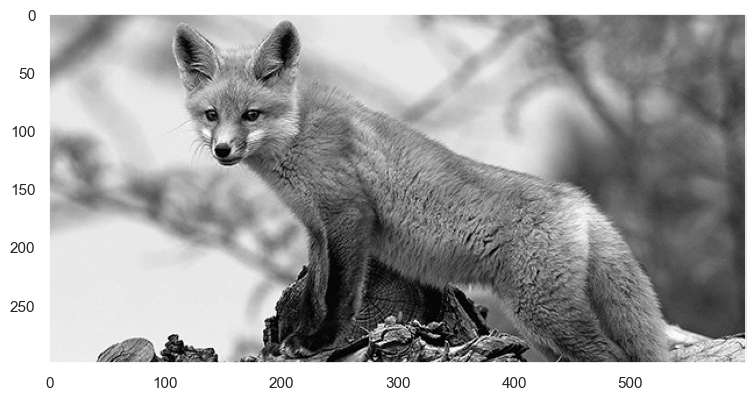

In [14]:
# img = Image.open('fox.jpeg') # load
img = Image.open(requests.get('http://www.nwf.org/-/media/NEW-WEBSITE/Shared-Folder/Wildlife/Mammals/mammal_red-fox-kit-nebraska_william-wiley_600x300.ashx', stream=True).raw)
imggray = img.convert('LA') # grayscale
imgmat = np.array(list(imggray.getdata(band=0)), float) # convert to numpy array
imgmat.shape = (imggray.size[1], imggray.size[0]) # get handle on dimensions
plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.grid()
plt.show()

Compute the SVD using NumPy's `np.linalg.eig(A)` function:

In [15]:
U, S, V = np.linalg.svd(imgmat)
print("img: {}; U: {}; S: {}; V: {}".format(imgmat.shape, U.shape, S.shape, V.shape))

img: (300, 600); U: (300, 300); S: (300,); V: (600, 600)


Iterate over number of singular vectors and plot the reconstructed image for each value:

img: (300, 600)
U': (300, 5)
S': (5, 5)
V': (5, 600)
Memory consumption by original image: 1440.0 kB
Memory consumption by compressed image: 36.04 kB
Compression Ratio: 39.956


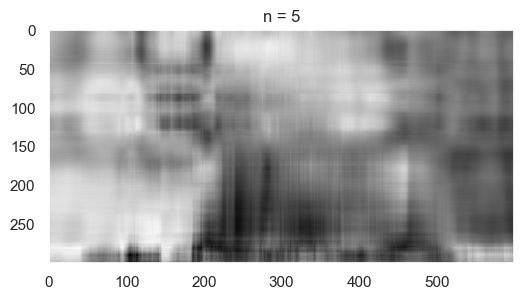

img: (300, 600)
U': (300, 10)
S': (10, 10)
V': (10, 600)
Memory consumption by original image: 1440.0 kB
Memory consumption by compressed image: 72.08 kB
Compression Ratio: 19.978


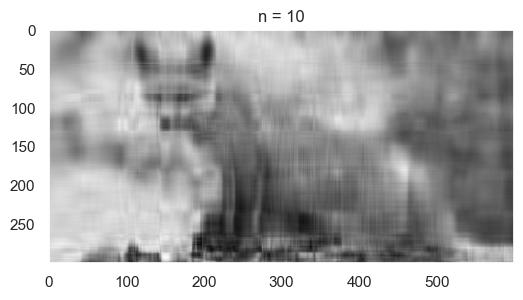

img: (300, 600)
U': (300, 25)
S': (25, 25)
V': (25, 600)
Memory consumption by original image: 1440.0 kB
Memory consumption by compressed image: 180.2 kB
Compression Ratio: 7.991


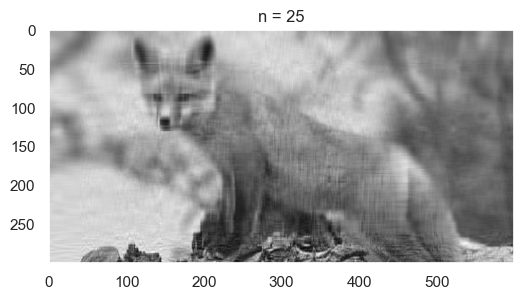

img: (300, 600)
U': (300, 50)
S': (50, 50)
V': (50, 600)
Memory consumption by original image: 1440.0 kB
Memory consumption by compressed image: 360.4 kB
Compression Ratio: 3.996


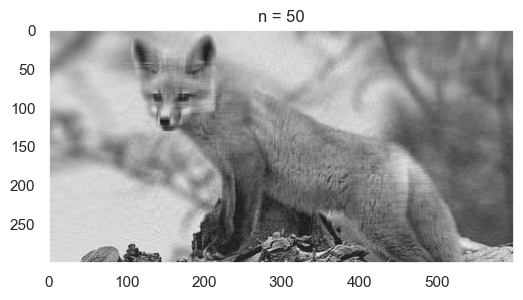

img: (300, 600)
U': (300, 100)
S': (100, 100)
V': (100, 600)
Memory consumption by original image: 1440.0 kB
Memory consumption by compressed image: 720.8 kB
Compression Ratio: 1.998


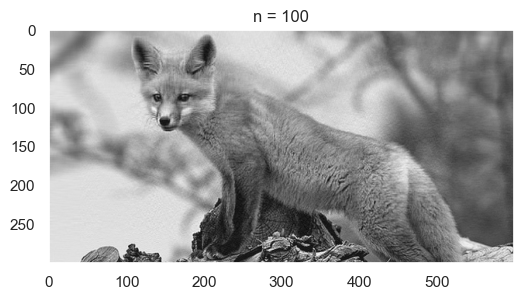

In [16]:
for i in [5, 10, 25, 50, 100]:
    reconstruct_img = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])
    print("img: {}\nU': {}\nS': {}\nV': {}".format(imgmat.shape, U[:, :i].shape, np.diag(S[:i]).shape,V[:i, :].shape))
    print("Memory consumption by original image: {} kB".format(imgmat.nbytes/1000.0))
    print("Memory consumption by compressed image: {} kB".format((U[:, :i].nbytes+S[:i].nbytes+V[:i, :].nbytes)/1000.0))
    print("Compression Ratio: %.3f" % (imgmat.nbytes/(U[:, :i].nbytes+S[:i].nbytes+V[:i, :].nbytes)))
    plt.figure(figsize=(6, 4))
    plt.imshow(reconstruct_img, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.grid()
    plt.show()

## 3. Principal Component Analysis <a class="anchor" id="second-bullet"></a>

Computational goal: to find **Principal Components** that 


- Are linear combinations of the original ones

- Are uncorrelated with one another

- Are orthogonal in original dimension space

- Capture as much of the original variance in the data as possible

In [17]:
class PCA():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and
    maximizing the variance along each feature axis.
    """
    def _init__(self):
        self.eigenValues=None
        self.components=None
        
    def transform(self, X, n_components):
        """ Fit the dataset to the number of principal components specified in the
        constructor and return the transformed dataset """
        covariance_matrix = self.calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1] # [3, 2, 1] ---> [2, 1, 0] --> [0, 1, 2]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
        
        # Set the object variables
        self.eigenValues=eigenvalues
        self.components=eigenvectors

        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed
    
    def calculate_covariance_matrix(self, X, Y=None):
        """ Calculate the covariance matrix for the dataset X """
        if Y is None:
            Y = X
        n_samples = np.shape(X)[0]
        covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

        return np.array(covariance_matrix, dtype=float)

In [18]:
## Load Data and Do PCA
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [40]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
print("Types of iris: ", iris.target_names)

Types of iris:  ['setosa' 'versicolor' 'virginica']


In [20]:
## Do PCA and plot the features. Since there are three types of iris, ideally we should be able to see 3 well seperated clusters
pca=PCA()
X_transformed=pca.transform(StandardScaler().fit_transform(X), 2)

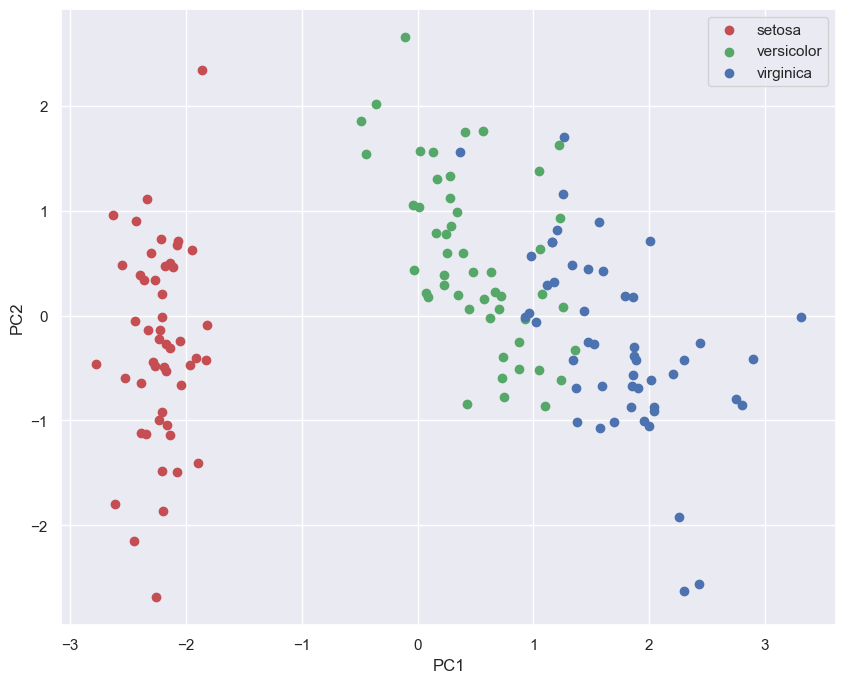

In [21]:
target_ids = range(len(iris.target_names))
plt.figure(figsize=(10, 8))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], c=c, label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [22]:
### Now imagine that there is a dataset with high number of features e.g 1e8. You want to do PCA to reduce the number of dimensions.
### What is number of dimensions that you should reduce to so that much of variance of the data is covered in lower dimension.



In [23]:
### Load and Print shape of the data
cancer=datasets.load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [24]:
pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA())])
pca_pipeline.fit(cancer.data)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA())])

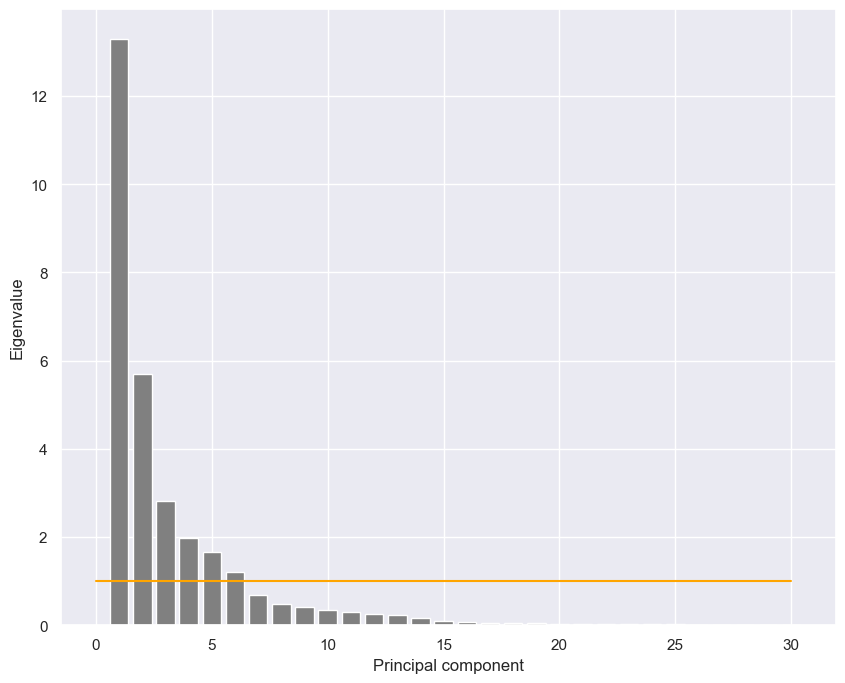

In [25]:
## Kaiser Criterion: Consider all principal components with eigen values greater than 1.0
eigVals=pca_pipeline[1].explained_variance_
nComponents = 30
x = np.linspace(1,nComponents, nComponents)
plt.figure(figsize=(10, 8))
plt.bar(x, eigVals, color='gray')
plt.plot([0,nComponents],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

According to Kaiser Criterion we should consider 6 principal components, so the data after dimensionality reduction should be (569, 6) 

**Question**: How much variance is explained by the principal components chosen by Kaiser Criterion above?

In [26]:
covarExplained = eigVals/sum(eigVals)*100
print("Variance explained by the 6 PCs above is: %.3f " % (sum(covarExplained[:6])))

Variance explained by the 6 PCs above is: 88.759 


## 4. K-Means Clustering <a class="anchor" id="third-bullet"></a>

K Means is an algorithm for unsupervised clustering: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm. It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

In [27]:
"""
Bare Bones implementation of KMeans
"""
def KMeans(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
#     print(i.shape)
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

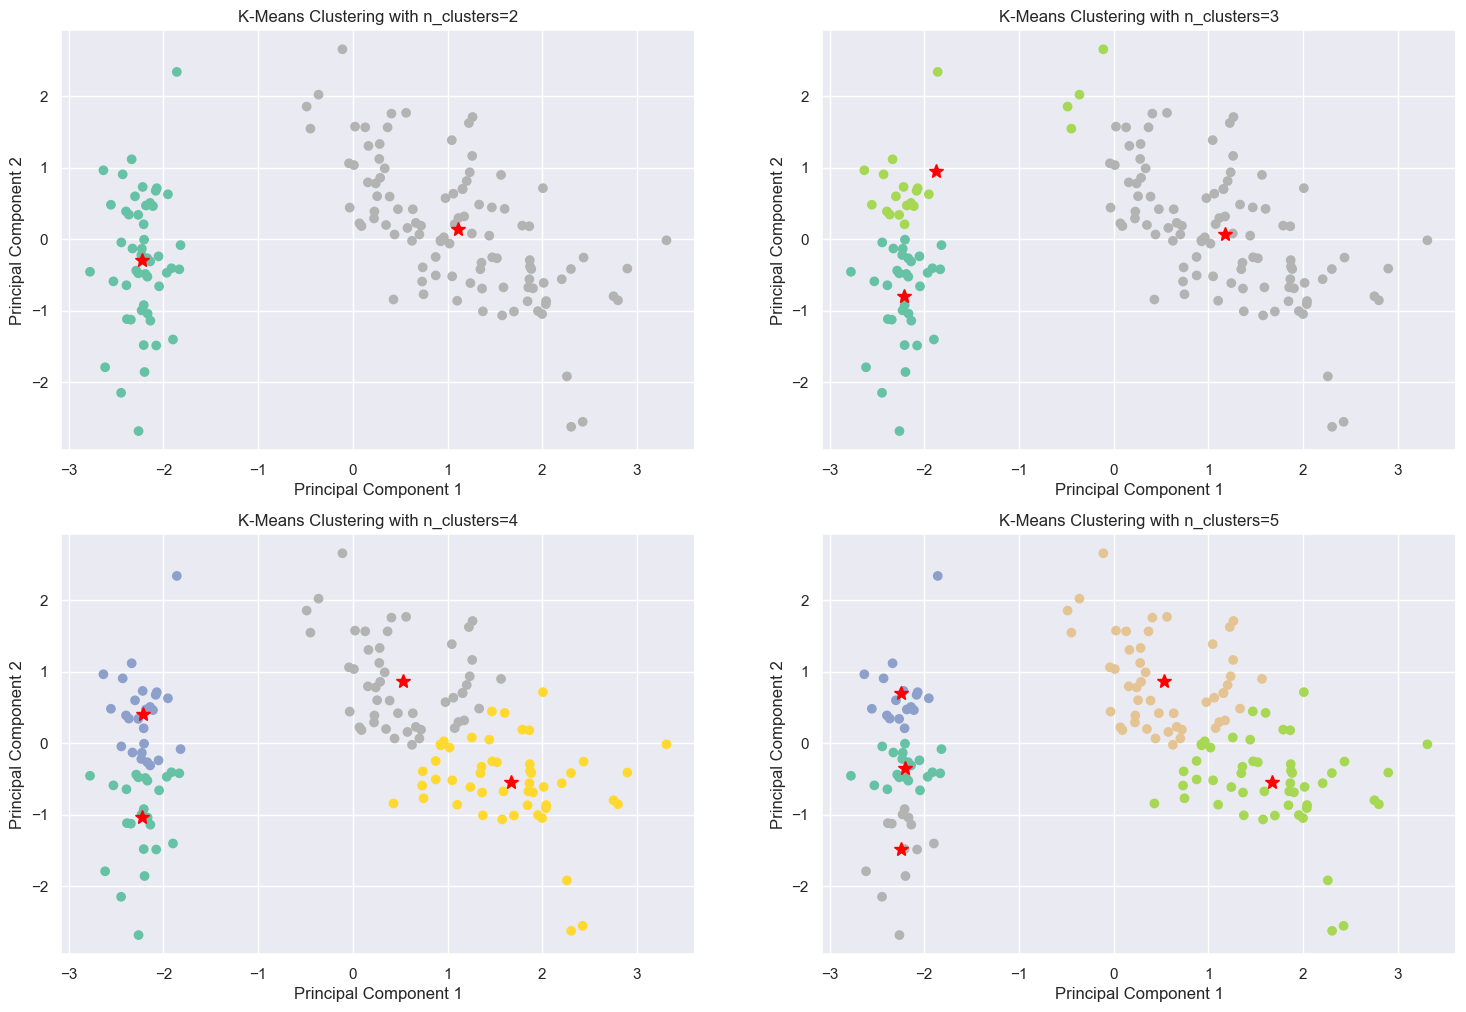

In [28]:
### Let's Cluster K-Means for the iris data used above
n_clusters=range(2, 6)
plt.figure(figsize=(18, 12))
for i, c_num in enumerate(n_clusters):
    centers, labels = KMeans(X_transformed, c_num)
    plt.subplot(2, 2, i+1)
    plt.title('K-Means Clustering with n_clusters={}'.format(c_num))
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='Set2')
    plt.plot(centers[:, 0], centers[:, 1], '*',markersize=10,color='red')

In [29]:
### How to choose n_clusters in KMeans when we do not have an idea about class distribution?

#### Silhouette Score
if a(i) is the mean **intraclsuter distance** and b(i) is the mean **intercluster distance** with the nearest neighboring cluster then:
\begin{equation}
s(i) = \frac{b(i)-a(i)}{max(a(i), b(i))}
\end{equation}
s(i) varies from -1 to 1 inclusive.

In [30]:
## Let's find the optimal number of wines using KMeans and Silhouette Score
df=pd.read_csv('./wine-clustering.csv')
print("Shape of the data: ", df.shape)
df.head()

Shape of the data:  (178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
wine_pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA(n_components=2))])
wine_processed = wine_pca_pipeline.fit_transform(df.values)

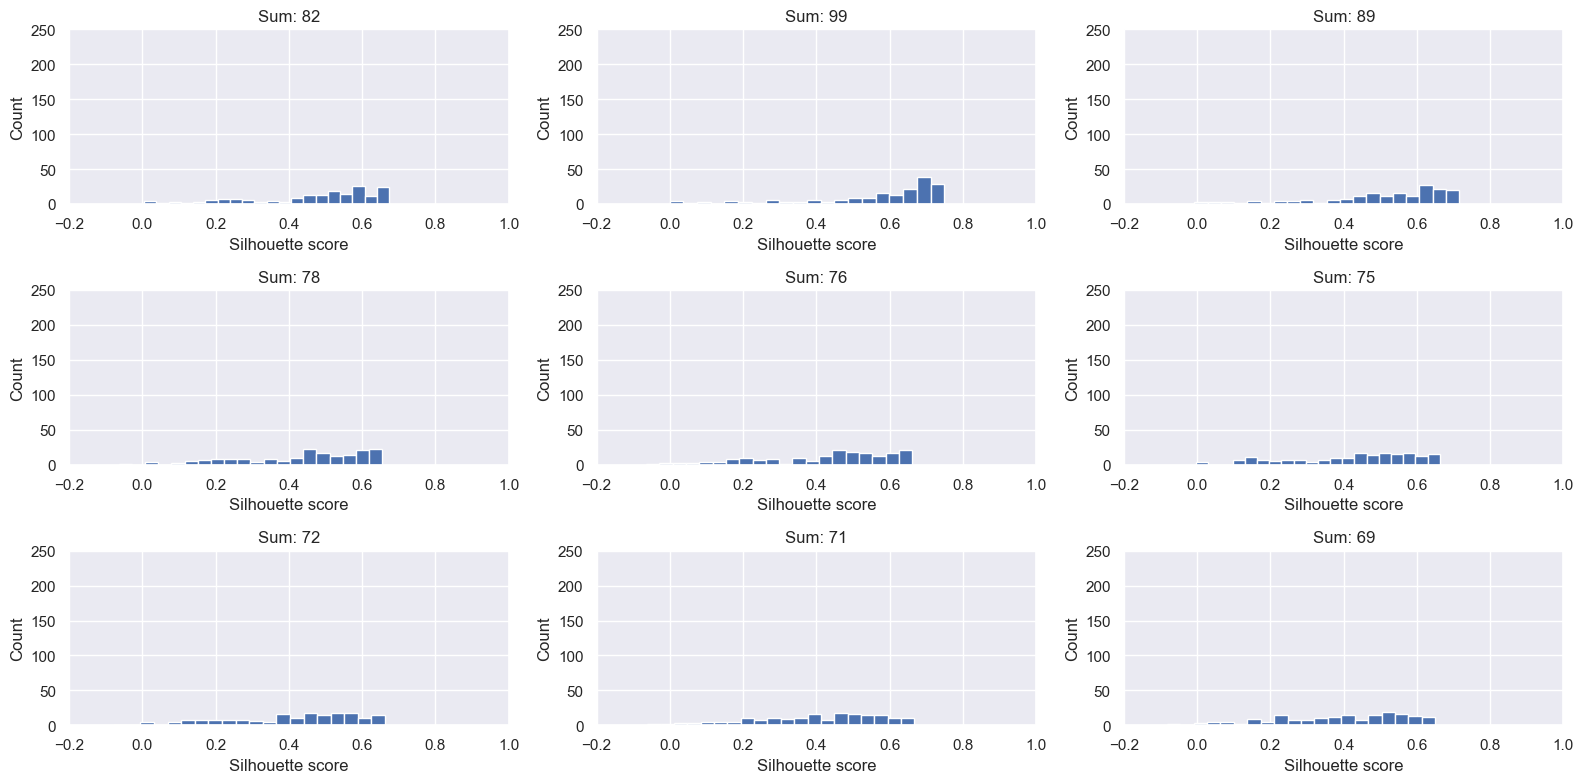

In [32]:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = sk_KMeans(n_clusters = int(ii)).fit(wine_processed) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(wine_processed,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

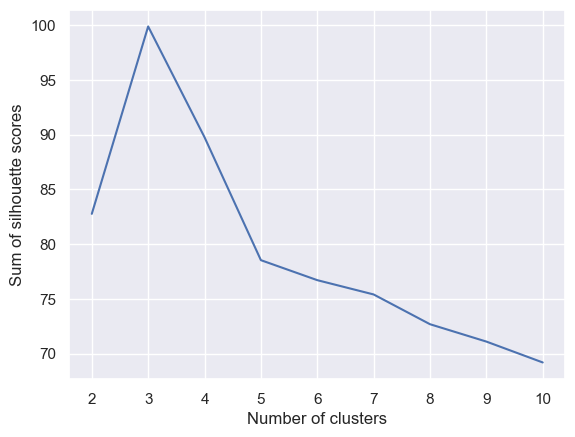

In [33]:
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

The number of wines in the dataset are 3!

In [34]:
# Lets see a case where KMeans fails
def make_crater (inner_rad=4, outer_rad=4.5, donut_len=2, inner_pts=1000, outer_pts=500, label=False):
    np.random.seed(12)
    # Make the inner core
    radius_core = inner_rad*np.random.random (inner_pts)
    direction_core = 2*np.pi*np.random.random (size=inner_pts)

    # Simulate inner core points
    core_x = radius_core*np.cos (direction_core)
    core_y = radius_core*np.sin (direction_core)
    crater_core = pd.DataFrame ({'x_1': core_x, 'x_2': core_y})
    if label: crater_core['label'] = 0

    # Make the outer ring
    radius_ring = outer_rad + donut_len*np.random.random(outer_pts)
    direction_ring = 2*np.pi*np.random.random(size = outer_pts)

    # Simulate ring points
    ring_x = radius_ring*np.cos(direction_ring)
    ring_y = radius_ring*np.sin(direction_ring)
    crater_ring = pd.DataFrame ({'x_1': ring_x, 'x_2': ring_y})
    if label: crater_ring['label'] = 1

    return pd.concat ([crater_core, crater_ring])


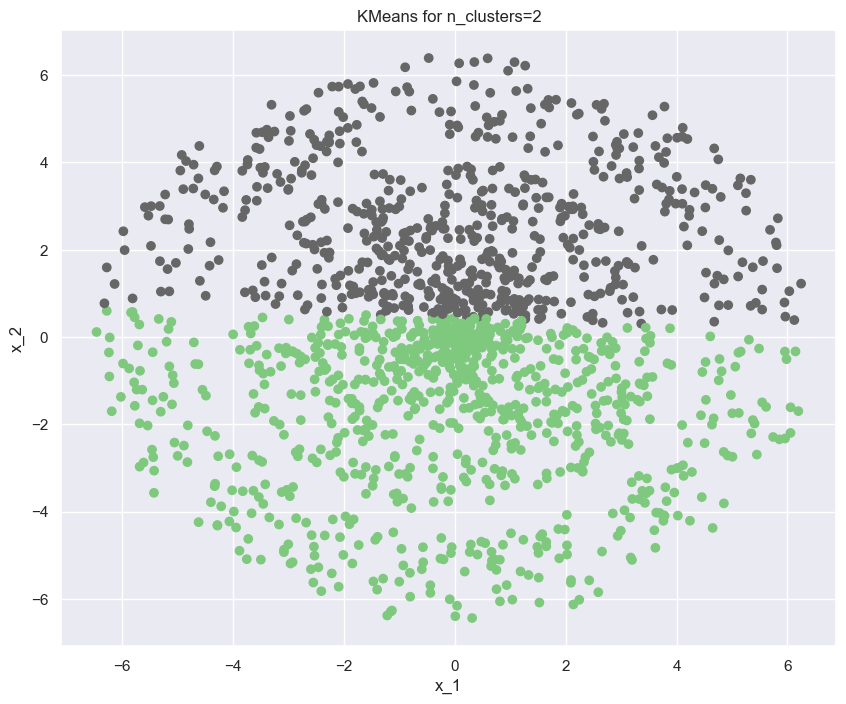

In [35]:
#### Scatter Plot for KMeans for n_clusters=2
crater_df=make_crater()
crater_kmeans=sk_KMeans(n_clusters=2)
crater_kmeans.fit(crater_df.values)
kmeans_labels=crater_kmeans.predict(crater_df.values)

plt.figure(figsize=(10, 8))
plt.scatter(crater_df.values[:, 0], crater_df.values[:, 1], c=kmeans_labels, cmap='Accent')
plt.title("KMeans for n_clusters=2")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

## 5. DBSCAN <a class="anchor" id="fourth-bullet"></a>

#### Neighborhoods

The first important concept in DBSCAN is that of an _$\epsilon$-neighborhood_.

Consider any point $p$. The $\epsilon$-neighborhood of $p$ is the set of all points within a distance of $\epsilon$ from $p$. That is, if $\{\hat{x}_0, \hat{x}_1, \ldots, \hat{x}_{m-1}\}$ is a collection of $m$ data points, then the $\epsilon$-neighborhood centered at $p$ is

$$
  N_{\epsilon}(p) = \{\hat{x}_i : \|\hat{x}_i - p\|_2 \leq \epsilon\},
$$

where the measure of distance is Euclidean (i.e., the two-norm). Notice that this definition would _include_ the point $p$ if $p$ is one of the data points.

#### Density

The next important concept in DBSCAN is that of the _density_ of a neighborhood. Intuitively, the DBSCAN algorithm will try to "grow" clusters around points whose neighborhoods are sufficiently dense.

Let's make this idea more precise.

**Definition: _core points_.** A point $p$ is a _core point_ if its $\epsilon$-neighborhood has at least $s$ points.

In other words, the algorithm now has two user-defined parameters: the neighborhood size, $\epsilon$, and the minimum density, specified using a threshold $s$ on the number of points in such a neighborhood.

#### Growing clusters via "reachable" points

The last concept needed for DBSCAN is the idea of _growing_ a cluster around a core point. It depends on the notion of _reachability_.

**Definition: Reachability.** A point $q$ is _reachable_ from another point $p$ if there exists a sequence of points $p=p_1, p_2, \ldots, p_k=q$ such that every $p_i$ is a core point, possibly except for $p_k=q$, and $p_{i} \in N_\epsilon(p_{i-1})$ for all $1 < i < k$.

This procedure works as follows.

**"Expand Cluster"** procedure:
1. Consider any point $p$ that is not yet assigned to a cluster.
2. If $p$ is a core point, then start a new cluster for it.
3. Maintain a "reachable" set, which will be used to hold points that are reachable from $p$ as they are encountered. Initially, the reachable points are just $p$'s $\epsilon$-neighbors.
4. Remove any point $q$ from the reachable set.
5. If $q$ has not yet been visited, then mark it as being visited.
6. If $q$ is also a core point, then add all of its neighbors to the reachable set, per the definition of "reachability" above.
7. If $q$ is not yet assigned to any cluster, then add it to $p$'s cluster.

Notice how this procedure explores the points reachable from $p$ (Step 6). Intuitively, it is trying to join all neighborhoods whose core points are mutually contained.

In [36]:
class DBSCAN:
    def region_query (self, p, eps, X):
        '''
        Generates boolean array of all data points which belong
        in epsilon neighborhood of p
        '''
        _, dim = X.shape
        assert (p.shape == (dim,)) or (p.shape == (1, dim)) or (p.shape == (dim, 1))

        return np.linalg.norm (p - X, axis=1) <= eps
    
    def index_set (self, y):
        """
        Given a boolean vector, this function returns
        the indices of all True elements in the outputs
        of the region_query function
        """
        assert len (y.shape) == 1

        return set (np.where (y)[0])
    
    def find_neighbors (self, eps, X):
        """
        Finds epsilon neighbors for all points in the dataset.
        """
        m, d = X.shape
        neighbors = [] # Empty list to start
        
        for i in range (len (X)):
            n_i = self.index_set (self.region_query (X[i, :], eps, X))
            neighbors.append (n_i)
        assert len (neighbors) == m
        return neighbors
    
    def find_core_points (self, s, neighbors):
        """
        checks the neigbors list for each point
        and if density is greater than s then the
        point is added as a core point
        """
        assert type (neighbors) is list
        assert all ([type (n) is set for n in neighbors])

        core_set = set ()
        for i, n_i in enumerate (neighbors):
            if len (n_i) >= s:
                core_set.add (i)
        return core_set
    
    def expand_cluster (self, p, neighbors, core_set, visited, assignment):
        """
        Given a core point for which cluster label has been assigned, the reachable
        points from there is expanded.
        """
        # Assume the caller performs Steps 1 and 2 of the procedure.
        # That means 'p' must be a core point that is part of a cluster.
        assert (p in core_set) and (p in visited) and (p in assignment)

        reachable = set (neighbors[p])  # Step 3
        while reachable:
            q = reachable.pop () # Step 4

            # Put your reordered and correctly indented statements here:
            if q not in visited:
                visited.add (q) # Mark q as visited
                if q in core_set:
                    reachable |= neighbors[q]
            if q not in assignment:
                assignment[q] = assignment[p]
                
    def __call__(self, eps, s, X):
        """
        Function which puts together all the helper function
        and runs the DBSCAN algorithm.
        """
        clusters = []
        point_to_cluster = {}

        neighbors = self.find_neighbors (eps, X)
        core_set = self.find_core_points (s, neighbors)

        assignment = {}
        next_cluster_id = 0

        visited = set ()
        for i in core_set: # for each core point i
            if i not in visited:
                visited.add (i) # Mark i as visited
                assignment[i] = next_cluster_id
                self.expand_cluster (i, neighbors, core_set,
                                visited, assignment)
                next_cluster_id += 1

        return assignment, core_set

In [37]:
dbscan = DBSCAN()
assignment, coreset = dbscan(0.61, 6, crater_df.values)

In [38]:
print ("Number of core points:", len (coreset))
print ("Number of clusters:", max (assignment.values ())+1)
print ("Number of unclassified points:", len (crater_df.values) - len (assignment))


Number of core points: 1409
Number of clusters: 3
Number of unclassified points: 3


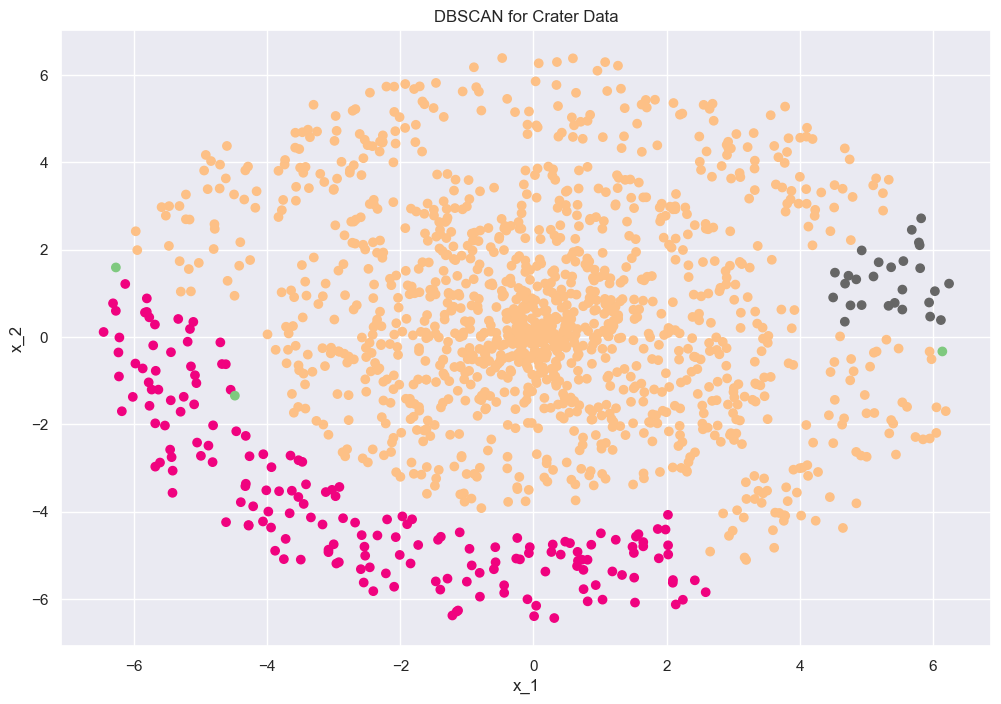

In [39]:
labels = [-1] * len (crater_df.values)
for i, c in assignment.items ():
    labels[i] = c

plt.figure(figsize=(12, 8))
plt.scatter(crater_df.values[:, 0], crater_df.values[:, 1], c=labels, cmap='Accent')
plt.title("DBSCAN for Crater Data")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()